## Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt    
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

import pickle as pkl
import json

## Data Collection

In [2]:
df = pd.read_csv(r"E:\Intership\Credit_Card_Default\UCI_Credit_Card\UCI_Credit_Card.csv", encoding= 'utf-8')
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [3]:
df.rename(columns= {'default.payment.next.month': 'Default'}, inplace=True)

## EDA(Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

#### 1. LIMIT_BAL

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

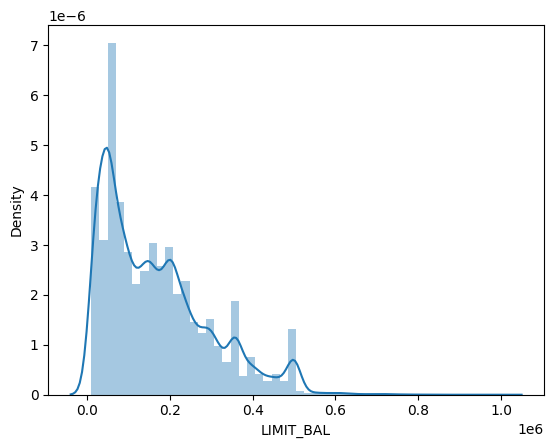

In [5]:
sns.distplot(df['LIMIT_BAL'])

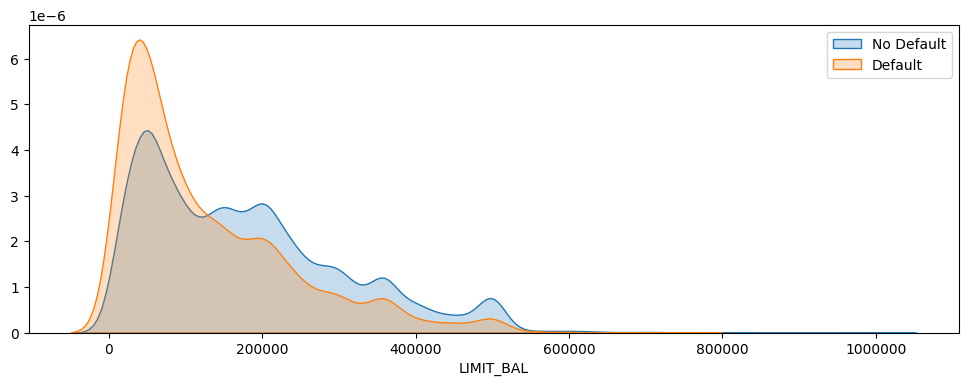

In [6]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()


In [7]:
array1 = boxcox(df['LIMIT_BAL'])[0]

<Axes: ylabel='Count'>

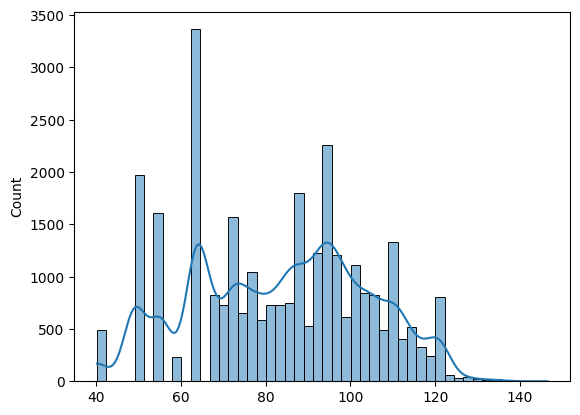

In [8]:
sns.histplot(array1, kde= True)

<Axes: ylabel='Count'>

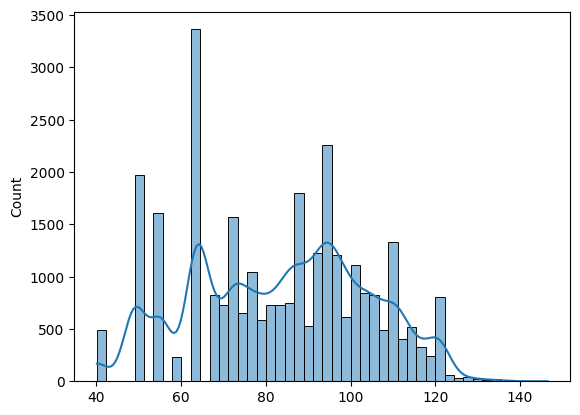

In [9]:
array2 = yeojohnson(df['LIMIT_BAL'])[0]
sns.histplot(array2, kde= True)

In [10]:
df['LIMIT_BAL'] = array2

#### 2. SEX

In [11]:
df['SEX'].replace({2:'Female', 1:'Male'}).value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

([<matplotlib.axis.XTick at 0x256c1858250>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

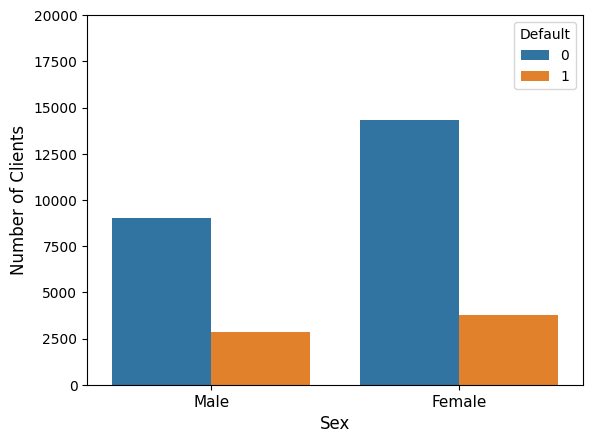

In [12]:
sns.countplot(data=df, x = 'SEX', hue = 'Default')
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

#### 3. EDUCATION

In [13]:
Edu = df['EDUCATION'].replace({1: 'Graduate School', 2: 'Uiversity', 3 : 'High School', 4 : 'Others', 5 : 'Unknown', 6 : 'Unknown', 0 : 'Unknown'})
Edu.value_counts()

Uiversity          14030
Graduate School    10585
High School         4917
Unknown              345
Others               123
Name: EDUCATION, dtype: int64

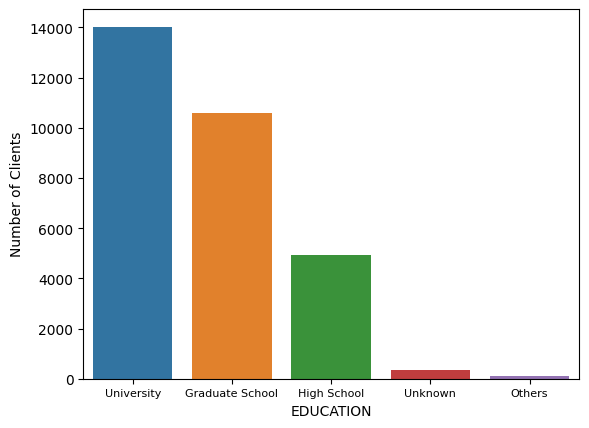

In [14]:
sns.countplot(data=df, x = Edu)
plt.xlabel("EDUCATION", fontsize= 10)
plt.ylabel("Number of Clients", fontsize= 10)
plt.xticks([0,1,2,3,4],['University','Graduate School','High School','Unknown','Others'], fontsize = 8)
plt.show()

#### 4. MARRIAGE

In [15]:
mar_d = df['MARRIAGE'].replace({1:'Married', 2:'Single', 3:'Others',0 :'Unknown'})
mar_d.value_counts()

Single     15964
Married    13659
Others       323
Unknown       54
Name: MARRIAGE, dtype: int64

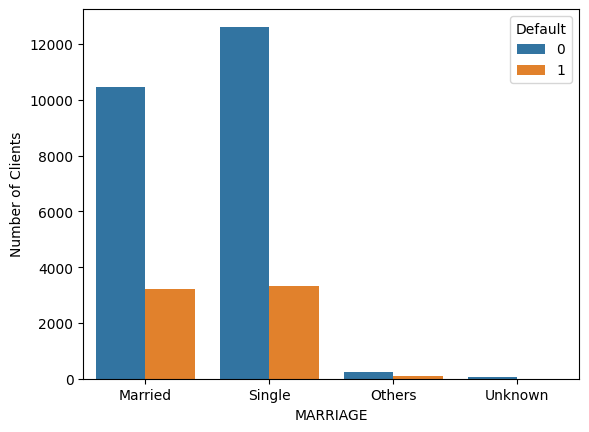

In [16]:
sns.countplot(data=df, x = mar_d, hue='Default')
plt.xlabel("MARRIAGE", fontsize= 10)
plt.ylabel("Number of Clients", fontsize= 10)
plt.xticks([0,1,2,3],['Married','Single','Others','Unknown'], fontsize = 10)
plt.show()

#### 5. AGE

<Axes: xlabel='AGE', ylabel='Density'>

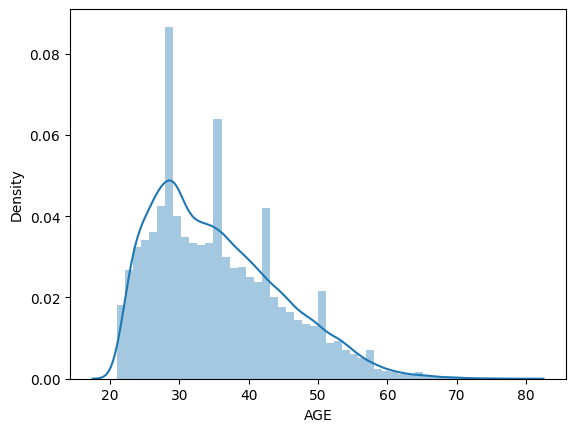

In [17]:
sns.distplot(df['AGE'])

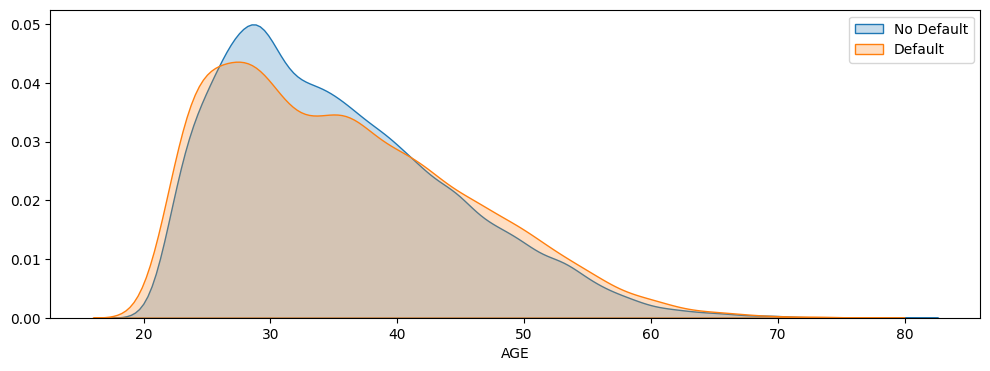

In [18]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['Default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['Default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()


<Axes: xlabel='AGE', ylabel='Density'>

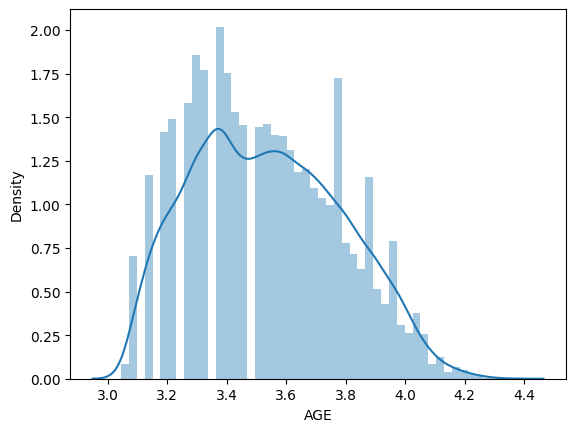

In [19]:
sns.distplot(np.log(df['AGE']))

In [20]:
df['AGE'] = np.log(df['AGE'])

#### 6. PAY

<Axes: xlabel='PAY_6', ylabel='count'>

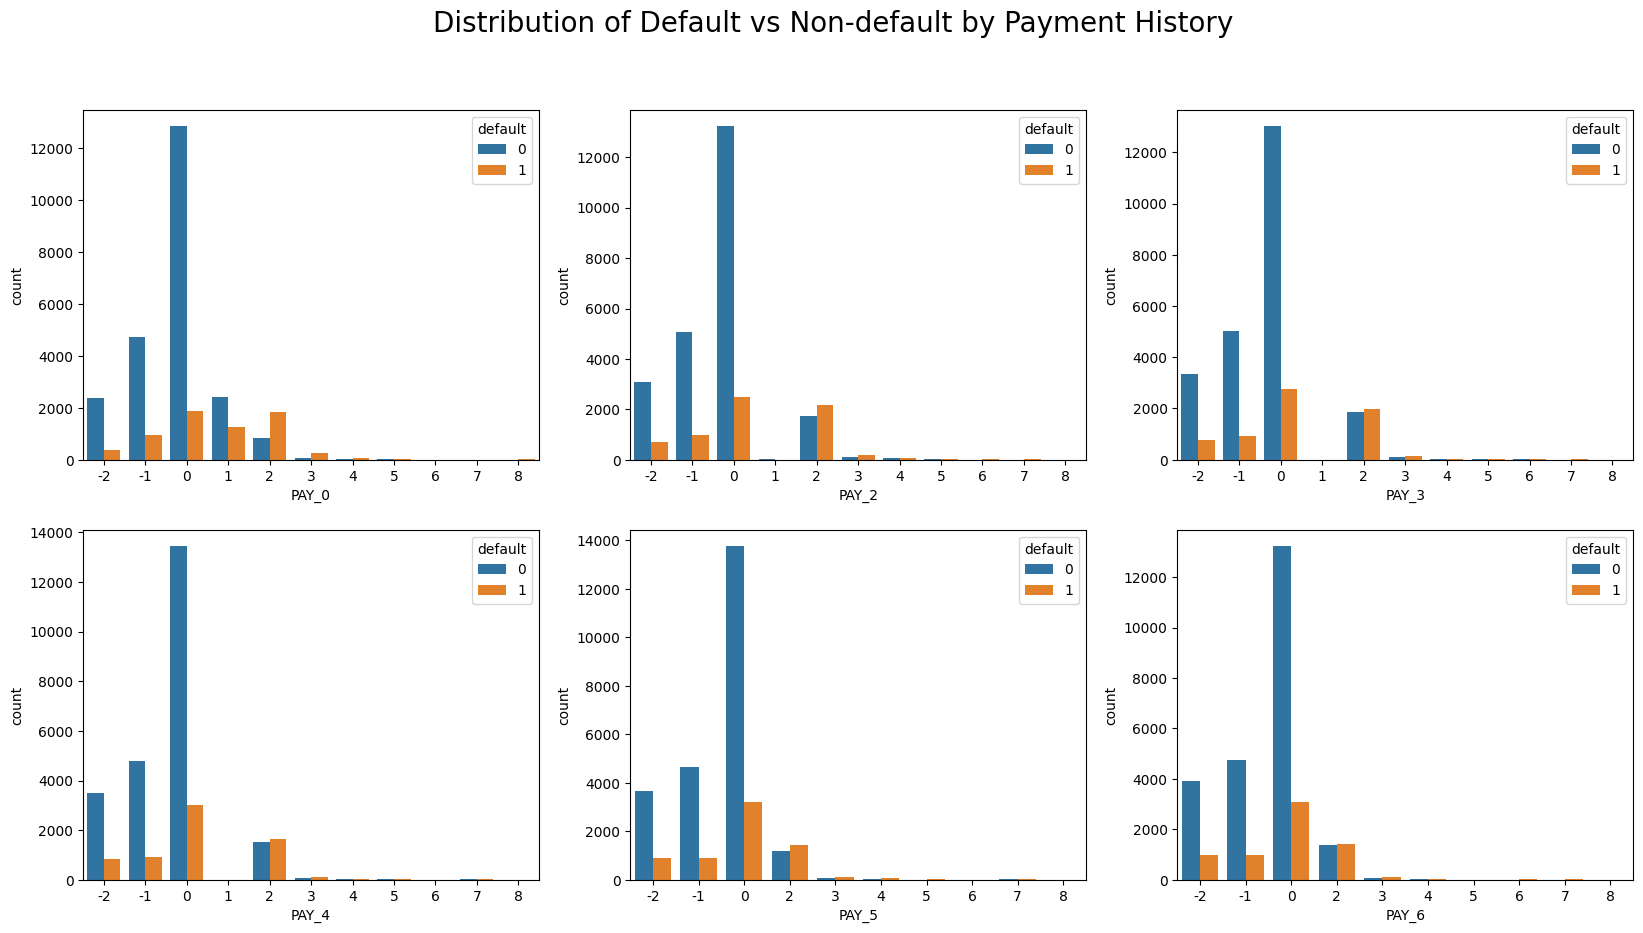

In [60]:
pay_hist = df.iloc[:,6:12]
pay_hist['default'] = df['Default']

f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Default vs Non-default by Payment History', size=20)
sns.countplot(x='PAY_0', hue="default", data=pay_hist, ax=axes[0,0])
sns.countplot(x="PAY_2", hue="default", data=pay_hist, ax=axes[0,1])
sns.countplot(x="PAY_3", hue="default", data=pay_hist, ax=axes[0,2])
sns.countplot(x="PAY_4", hue="default", data=pay_hist, ax=axes[1,0])
sns.countplot(x="PAY_5", hue="default", data=pay_hist, ax=axes[1,1])
sns.countplot(x="PAY_6", hue="default", data=pay_hist, ax=axes[1,2])

2: No consumption; (This would mean that the balance was paid in full and there were no further transactions.)
-1: Paid in full; (This would mean that the balance was paid in full but the account had a positive balance.)
0: The use of revolving credit; (This would mean that the minimum balance was paid and the user was revolving balance.)
1 = payment delay for one month;
2 = payment delay for two months;
3 = payment delay for three months;
4 = payment delay for four months;
5 = payment delay for five months;
6 = payment delay for six months;
7 = payment delay for seven months;
8 = payment delay for eight months;
9 = payment delay for nine months and above

#### 7. BILL_AMT

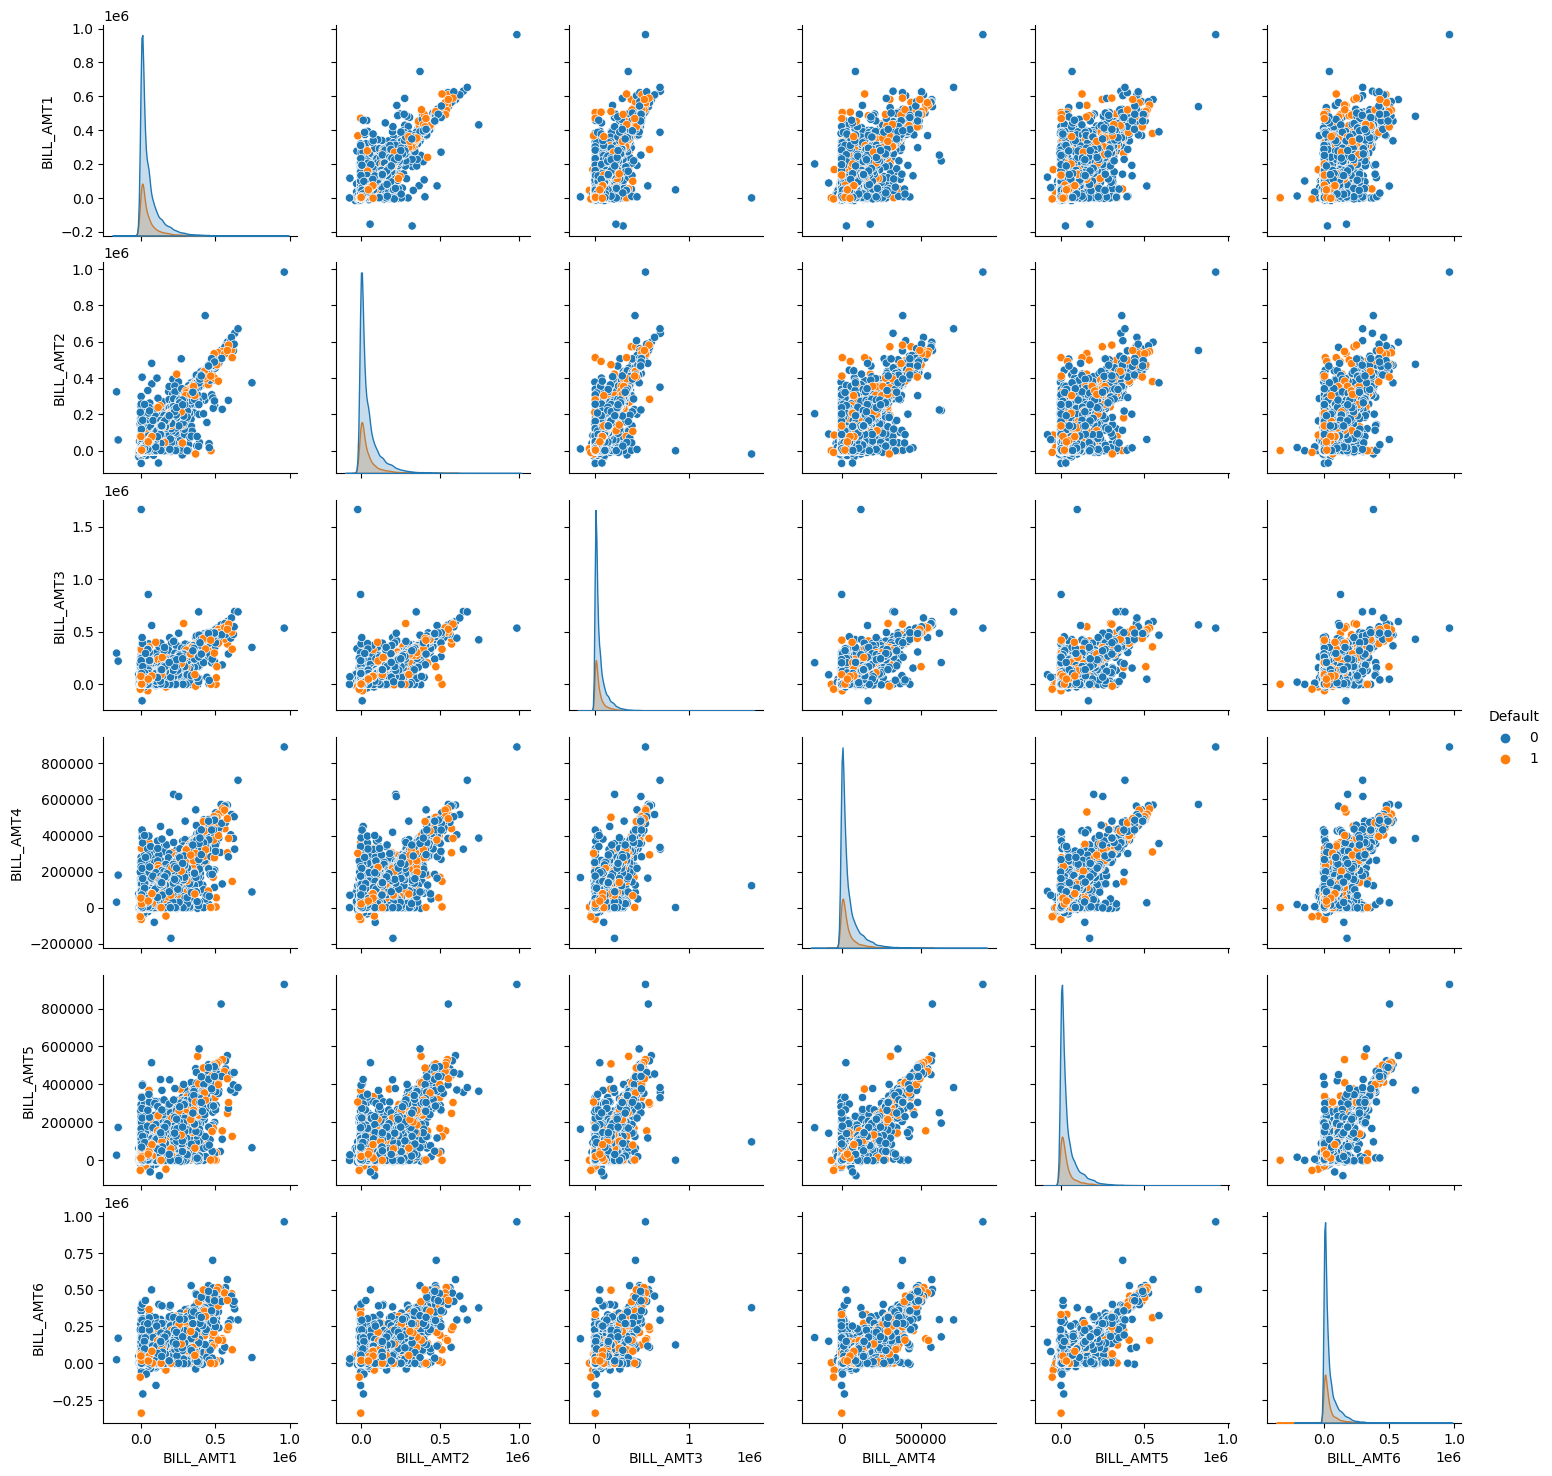

In [64]:
sns.pairplot(df, vars=df.columns[12:18], kind='scatter',hue= 'Default')

#### 8. PAY_AMT

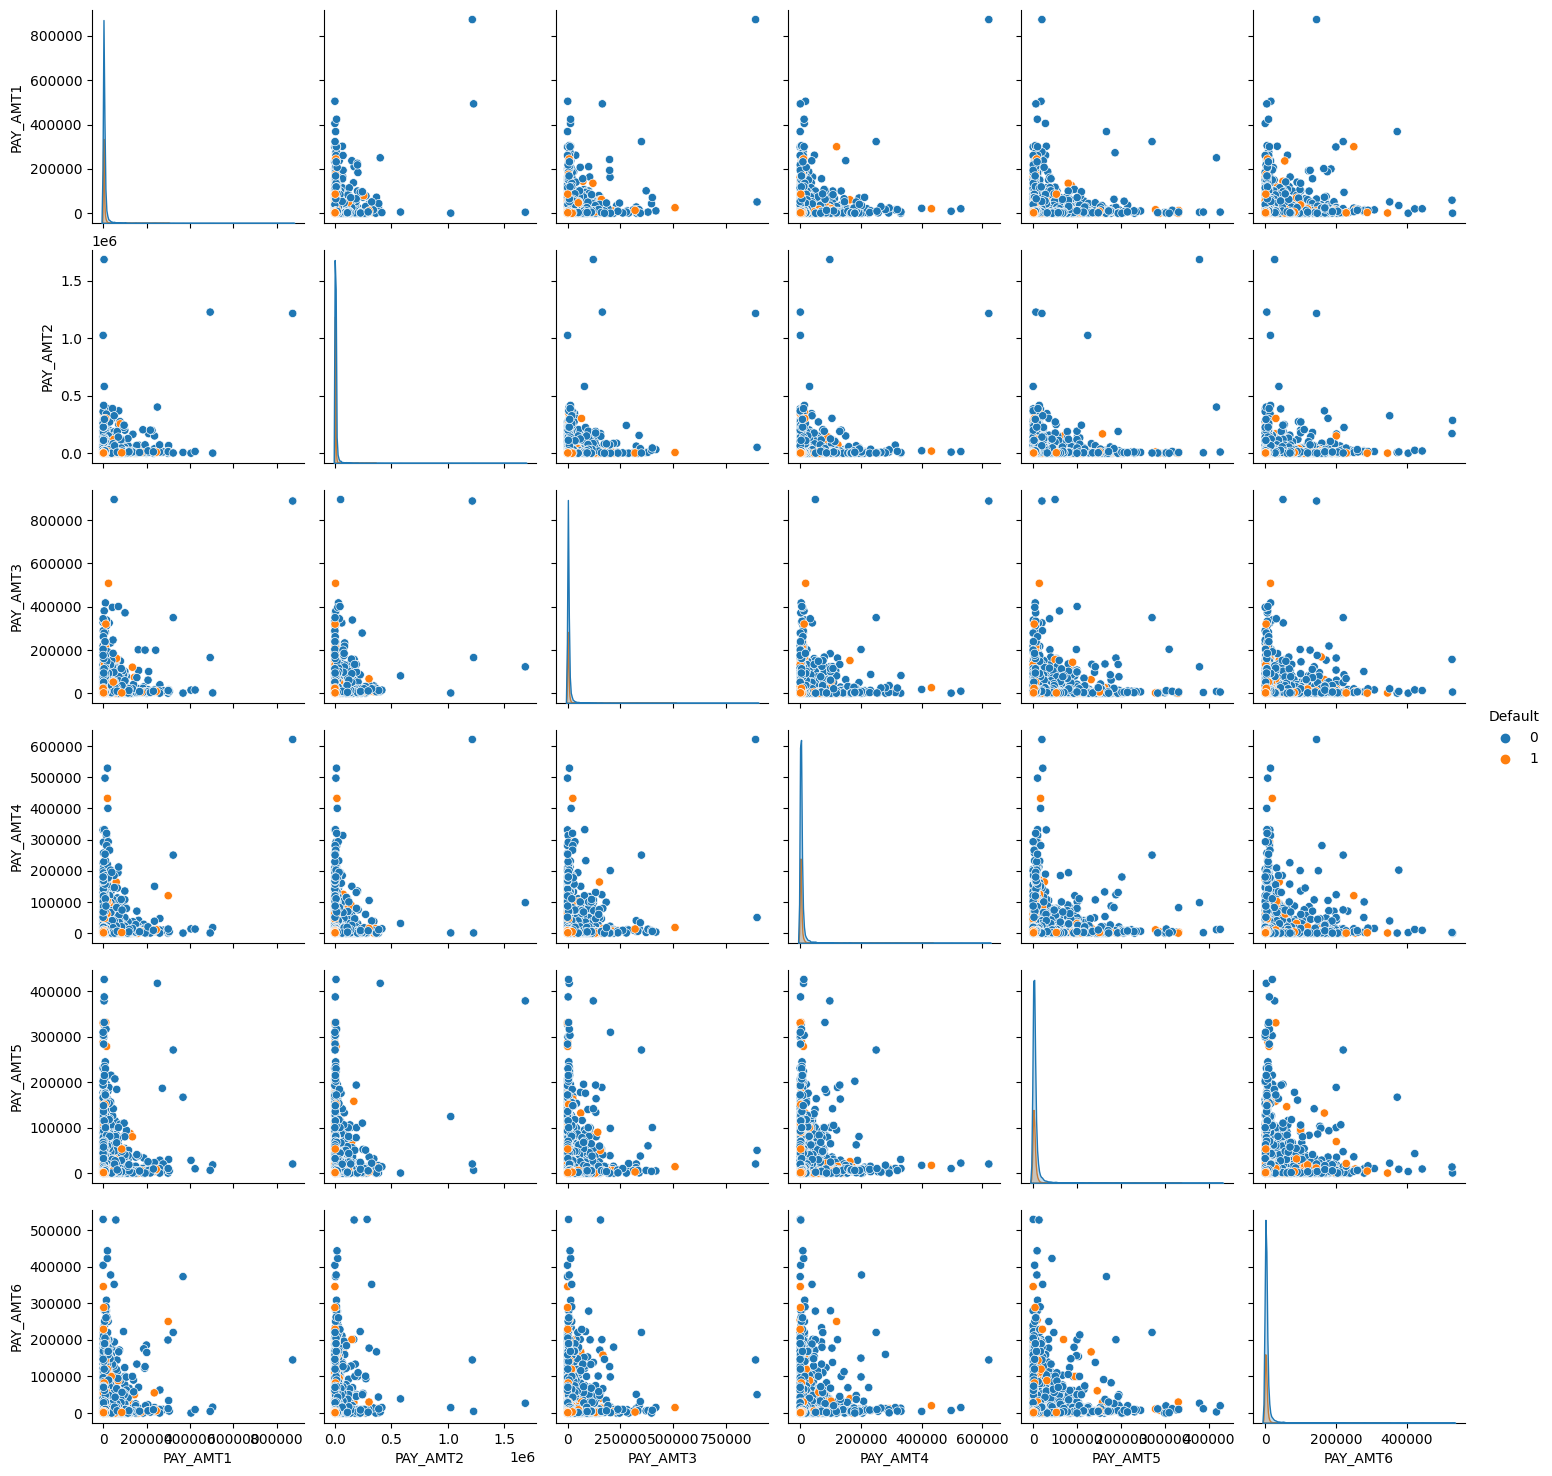

In [65]:
sns.pairplot(df, vars=df.columns[18:24], kind='scatter',hue= 'Default')

## Feature Engineering

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.000000,7500.750000,15000.500000,22500.250000,3.000000e+04
LIMIT_BAL,30000.0,83.400008,20.608018,40.146009,63.741939,85.125706,98.899885,1.465799e+02
SEX,30000.0,1.603733,0.489129,1.000000,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.853133,0.790349,0.000000,1.000000,2.000000,2.000000,6.000000e+00
MARRIAGE,30000.0,1.551867,0.521970,0.000000,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,3.536971,0.251541,3.044522,3.332205,3.526361,3.713572,4.369448e+00
PAY_0,30000.0,-0.016700,1.123802,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_2,30000.0,-0.133767,1.197186,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_3,30000.0,-0.166200,1.196868,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_4,30000.0,-0.220667,1.169139,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00


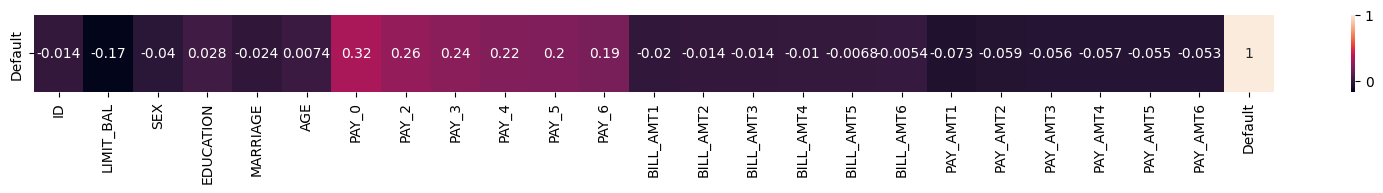

In [22]:
plt.figure(figsize=(20,1))
sns.heatmap(df.corr().tail(1), annot=True)
plt.show()

## Model Building

#### 1. Logistic Regression

In [23]:
X = df.drop(['ID','Default'], axis=1)
Y = df['Default']

In [24]:
smote = SMOTE(k_neighbors=5,sampling_strategy=0.8,random_state=5)
x_sampled, y_sampled = smote.fit_resample(X,Y)
y_sampled.shape

(42055,)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.25, stratify=y_sampled, random_state=42)

In [26]:
log_reg = LogisticRegression(penalty='l1',solver='liblinear')
log_reg.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
# def get_pred_class(threshold, pred_prob):
#     print("Pred Prob is :",np.around(pred_prob,3))
#     if pred_prob >= threshold:
#         return "Class1"
    
#     else:
#         return "Class0"

# threshold = 0.19
# pred_prob = y_pred_train_prob_class1[54]

# pred_class = get_pred_class(threshold, pred_prob)
# print("Predicted class is :",pred_class)

#### 2. KNNClassifier

In [32]:
normal_scaler = StandardScaler() 
normal_scaler.fit(x_sampled)
array1 = normal_scaler.transform(x_sampled)
normal_dfx = pd.DataFrame(array1, columns=X.columns)
normal_dfx

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.593398,0.945485,0.289990,-0.909567,-1.484194,1.654774,1.638968,-0.778769,-0.732951,-1.554409,...,-0.665693,-0.669893,-0.660287,-0.653031,-0.339607,-0.218999,-0.291307,-0.302160,-0.307162,-0.286090
1,0.002794,0.945485,0.289990,1.022344,-1.153813,-0.997443,1.638968,0.039396,0.091315,0.136197,...,-0.636581,-0.618573,-0.603144,-0.597923,-0.339607,-0.203608,-0.228487,-0.231457,-0.307162,-0.162209
2,-0.307664,0.945485,0.289990,1.022344,-0.046540,-0.113371,0.002782,0.039396,0.091315,0.136197,...,-0.477698,-0.445114,-0.413059,-0.390267,-0.235291,-0.178865,-0.228487,-0.231457,-0.235480,0.023612
3,-0.872370,0.945485,0.289990,-0.909567,0.302476,-0.113371,0.002782,0.039396,0.091315,0.136197,...,0.044247,-0.225794,-0.181328,-0.153714,-0.202168,-0.153182,-0.215923,-0.224387,-0.230534,-0.224150
4,-0.872370,-1.057658,0.289990,-0.909567,2.086129,-0.997443,0.002782,-0.778769,0.091315,0.136197,...,-0.152308,-0.341453,-0.343627,-0.329735,-0.202168,1.562122,0.336887,0.334161,-0.257773,-0.244033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42050,-0.150360,-1.057658,-1.050768,-0.909567,2.199811,-0.113371,0.002782,1.675726,0.915581,0.136197,...,-0.558929,-0.578103,-0.595676,-0.609103,-0.099904,-0.244818,-0.283426,-0.301867,-0.304165,-0.109591
42051,-0.724176,-1.057658,1.630749,-0.909567,-0.376126,-0.113371,0.002782,0.039396,0.091315,0.136197,...,-0.269408,-0.321858,-0.328031,-0.317746,-0.232339,-0.186547,-0.249694,-0.253616,-0.228195,-0.282328
42052,-1.079394,-1.057658,0.289990,-0.909567,0.825650,-0.113371,0.002782,0.039396,0.091315,0.136197,...,-0.470723,-0.444366,-0.417183,-0.398146,-0.251751,-0.189700,-0.255112,-0.263166,-0.262095,-0.251650
42053,1.071488,0.945485,-1.050768,-0.909567,0.675726,-0.997443,-0.815311,0.039396,0.091315,0.136197,...,-0.309820,-0.343386,-0.446682,-0.593834,0.480574,0.826774,-0.285661,-0.210338,-0.092943,-0.205648


In [33]:
x_train, x_test, y_train, y_test = train_test_split(normal_dfx, y_sampled, test_size=0.25, stratify=y_sampled, random_state=42)

In [34]:
knn_clf = KNeighborsClassifier(n_neighbors=12, p = 1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

In [80]:
# knn_clf_model = KNeighborsClassifier(n_neighbors= 5, p = 2)

# hyp_grid = {"n_neighbors": np.arange(3,20),
#            'p' : [1,2]}

# gscv_knn_clf = GridSearchCV(knn_clf_model,hyp_grid, cv = 5)
# gscv_knn_clf.fit(x_train, y_train)
# gscv_knn_clf.best_estimator_

In [81]:
# train_accuracy_list = []
# test_accuracy_list = list()
# k_values = np.arange(3,20)
# for k in k_values:
#     knn_clf = KNeighborsClassifier(n_neighbors=k, p=1)
#     knn_clf.fit(x_train, y_train)
    
#     train_accuracy = np.around(knn_clf.score(x_train, y_train),3)
#     train_accuracy_list.append(train_accuracy)
    
#     test_accuracy = np.around(knn_clf.score(x_test, y_test),3)
#     test_accuracy_list.append(test_accuracy)

In [82]:
# plt.plot(k_values, train_accuracy_list)
# plt.plot(k_values, test_accuracy_list)
# plt.xlabel("K Values")
# plt.ylabel('Accuracies')
# plt.title("Train and Test Accuracies with Manhattan Distance")

In [83]:
# train_accuracy_list = []
# test_accuracy_list = list()
# k_values = np.arange(3,20)
# for k in k_values:
#     knn_clf = KNeighborsClassifier(n_neighbors=k, p=2)
#     knn_clf.fit(x_train, y_train)
    
#     train_accuracy = np.around(knn_clf.score(x_train, y_train),3)
#     train_accuracy_list.append(train_accuracy)
    
#     test_accuracy = np.around(knn_clf.score(x_test, y_test),3)
#     test_accuracy_list.append(test_accuracy)

In [84]:
# plt.plot(k_values, train_accuracy_list)
# plt.plot(k_values, test_accuracy_list)
# plt.xlabel("K Values")
# plt.ylabel('Accuracies')
# plt.title("Train and Test Accuracies with Manhattan Distance")

#### 3. Desion Tree

##### 3.1 Hypertunning

In [85]:
# dt_clf = DecisionTreeClassifier(random_state = 16, max_features=None)

# Hyperparameters = {'criterion' : ['gini', 'entropy'],
#                    'max_depth' : np.arange(2,8),
#                    'min_samples_split' : np.arange(3,20),
#                    'min_samples_leaf' : np.arange(2,10)}


# rscv_df_clf = RandomizedSearchCV(dt_clf, Hyperparameters, cv = 4, n_jobs = -1) # 3 to 10
# rscv_df_clf.fit(x_train, y_train)
# rscv_df_clf.best_estimator_

In [129]:
# dt_clf = DecisionTreeClassifier(random_state = 16, max_features=None)
# dt_clf = rscv_df_clf.best_estimator_

##### 3.2 Prunning

In [86]:
# dt_clf_pruning = DecisionTreeClassifier(random_state = 16)
# dt_clf_pruning.fit(x_train, y_train)
# result = dt_clf_pruning.cost_complexity_pruning_path(x_train, y_train)
# ccp_alphas_list = result['ccp_alphas']
# ccp_alphas_list

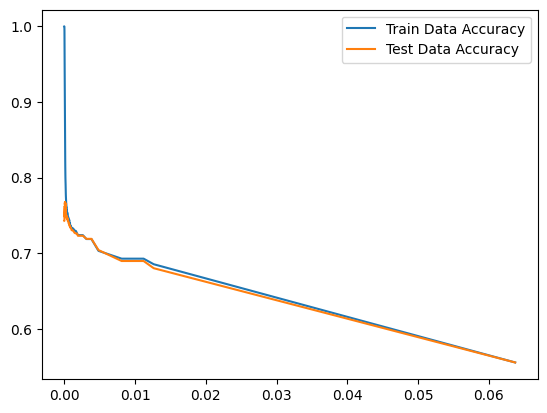

In [146]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alphas_list:
    dt_clf_pruning = DecisionTreeClassifier(random_state = 16,ccp_alpha=ccp_alpha)
    dt_clf_pruning.fit(x_train, y_train)
    
    train_accuracy = dt_clf_pruning.score(x_train, y_train)
    test_accuracy = dt_clf_pruning.score(x_test, y_test)

    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    
fig, ax = plt.subplots()
ax.plot(ccp_alphas_list, train_accuracy_list, label = 'Train Data Accuracy')
ax.plot(ccp_alphas_list, test_accuracy_list,label = "Test Data Accuracy")
ax.legend()

In [147]:
max(test_accuracy_list)
index = np.argmax(test_accuracy_list)
index

1972

In [87]:
# print("Train Acc :",train_accuracy_list[index])
# print("Test Acc :",test_accuracy_list[index])  
# print("CCP Alpha :",ccp_alphas_list[index])

In [149]:
# dt_clf_pruning = DecisionTreeClassifier(random_state = 16,ccp_alpha=ccp_alphas_list[index])
# dt_clf_pruning.fit(x_train, y_train)
# # plt.figure(figsize=(100,60))
# # tree = plot_tree(dt_clf_pruning,feature_names=x.columns, class_names=['0','1'], filled=True)
# # dt_clf_pruning.feature_importances_

DecisionTreeClassifier(ccp_alpha=9.794593281439632e-05, random_state=16)

#### 4. Random Forest

In [27]:
rf_clf = RandomForestClassifier(random_state=15, 
                               max_features='auto',
                               oob_score=False,
                               bootstrap=True,
                               n_jobs=-1)

hyperparameters = { "n_estimators" : np.arange(10,150,10),
                    "criterion" : ['gini', 'entropy'],
                    "max_depth" : np.arange(3,8),
                    "min_samples_split" : np.arange(4,20),
                    "min_samples_leaf" : np.arange(3,10)}

rscv_rf_clf = RandomizedSearchCV(rf_clf, hyperparameters, cv = 5)

rscv_rf_clf.fit(x_train, y_train)
rscv_rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       min_samples_leaf=3, min_samples_split=17,
                       n_estimators=140, n_jobs=-1, random_state=15)

In [28]:
rscv_rf_clf = rscv_rf_clf.best_estimator_

#### 5. adaboost

In [91]:
base_estimators = DecisionTreeClassifier()
adb_clf = AdaBoostClassifier()

hyp = {
        "n_estimators" : np.arange(10,100,10),
        "learning_rate" : np.arange(0.1,2,0.2),
        }

rscv_adb_clf = RandomizedSearchCV(adb_clf, hyp, cv = 5)
rscv_adb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [92]:
adb_clf = rscv_adb_clf.best_estimator_
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1.5000000000000004, n_estimators=70)

## Model Evaluation

#### 1. Logistic Regression

In [27]:
# Training data Evaluation
y_pred_train = log_reg.predict(x_train)

cnf_mat_train = confusion_matrix(y_pred_train, y_train)
print('Conifusion Matrix :\n', cnf_mat_train)

acc_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:\n",acc_train)

clf_report_train = classification_report(y_pred_train, y_train)
print("Classification Report:\n", clf_report_train)

Conifusion Matrix :
 [[13869  5073]
 [ 3654  8945]]
Accuracy:
 0.7233125138708348
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76     18942
           1       0.64      0.71      0.67     12599

    accuracy                           0.72     31541
   macro avg       0.71      0.72      0.72     31541
weighted avg       0.73      0.72      0.73     31541



In [28]:
# Testing data Evaluation
y_pred = log_reg.predict(x_test)

cnf_mat_test = confusion_matrix(y_pred, y_test)
print('Conifusion Matrix :\n', cnf_mat_test)

acc_test = accuracy_score(y_pred, y_test)
print("Accuracy:\n",acc_test)

clf_report_test = classification_report(y_pred, y_test)
print("Classification Report:\n", clf_report_test)

Conifusion Matrix :
 [[4584 1639]
 [1257 3034]]
Accuracy:
 0.7245577325470801
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      6223
           1       0.65      0.71      0.68      4291

    accuracy                           0.72     10514
   macro avg       0.72      0.72      0.72     10514
weighted avg       0.73      0.72      0.73     10514



In [29]:
y_pred_train = log_reg.predict(x_train)
y_pred_train_prob = log_reg.predict_proba(x_train)
y_pred_train_prob.shape 
y_pred_train_prob_class1 = y_pred_train_prob[:,1]

In [30]:
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob_class1)

Text(0.5, 1.0, 'ROC Curve')

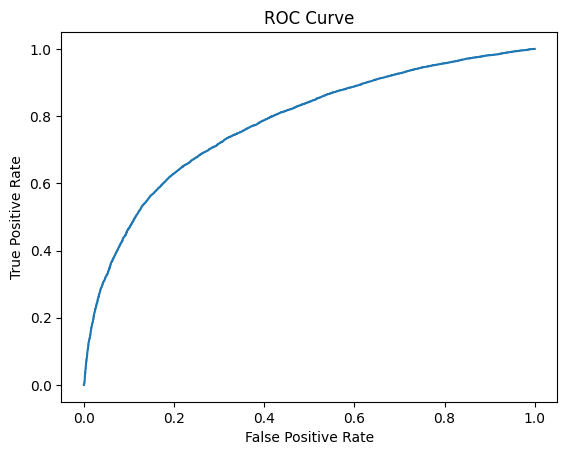

In [31]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

#### 2. KNNClassifier

In [35]:
# Training data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_pred_train, y_train)
print('Conifusion Matrix :\n', cnf_mat_train)

acc_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:\n",acc_train)

clf_report_train = classification_report(y_pred_train, y_train)
print("Classification Report:\n", clf_report_train)

Conifusion Matrix :
 [[14971  3937]
 [ 2552 10081]]
Accuracy:
 0.7942677784471006
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82     18908
           1       0.72      0.80      0.76     12633

    accuracy                           0.79     31541
   macro avg       0.79      0.79      0.79     31541
weighted avg       0.80      0.79      0.80     31541



In [36]:
# Testing data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_pred, y_test)
print('Conifusion Matrix :\n', cnf_mat_test)

acc_test = accuracy_score(y_pred, y_test)
print("Accuracy:\n",acc_test)

clf_report_test = classification_report(y_pred, y_test)
print("Classification Report:\n", clf_report_test)

Conifusion Matrix :
 [[4784 1448]
 [1057 3225]]
Accuracy:
 0.7617462431044322
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      6232
           1       0.69      0.75      0.72      4282

    accuracy                           0.76     10514
   macro avg       0.75      0.76      0.76     10514
weighted avg       0.77      0.76      0.76     10514



Text(0.5, 1.0, 'ROC Curve')

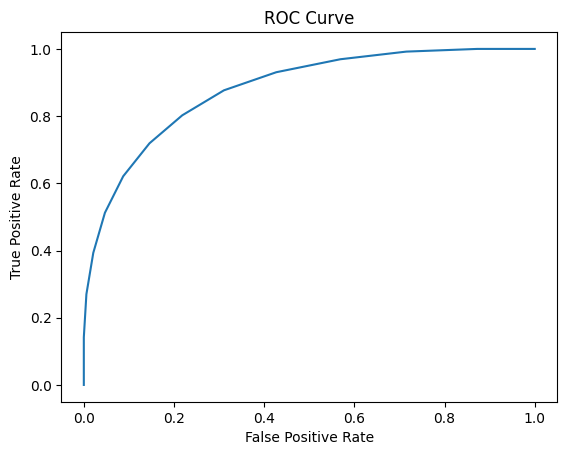

In [37]:
y_pred_train = knn_clf.predict(x_train)
y_pred_train_prob = knn_clf.predict_proba(x_train)
y_pred_train_prob.shape 
y_pred_train_prob_class1 = y_pred_train_prob[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob_class1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

#### 3. Desion Tree

In [142]:
# Training data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_pred_train, y_train)
print('Conifusion Matrix :\n', cnf_mat_train)

acc_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:\n",acc_train)

clf_report_train = classification_report(y_pred_train, y_train)
print("Classification Report:\n", clf_report_train)

Conifusion Matrix :
 [[14736  4945]
 [ 2787  9073]]
Accuracy:
 0.7548587552709172
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79     19681
           1       0.65      0.77      0.70     11860

    accuracy                           0.75     31541
   macro avg       0.74      0.76      0.75     31541
weighted avg       0.77      0.75      0.76     31541



In [143]:
# Testing data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_pred, y_test)
print('Conifusion Matrix :\n', cnf_mat_test)

acc_test = accuracy_score(y_pred, y_test)
print("Accuracy:\n",acc_test)

clf_report_test = classification_report(y_pred, y_test)
print("Classification Report:\n", clf_report_test)

Conifusion Matrix :
 [[4840 1697]
 [1001 2976]]
Accuracy:
 0.7433897660262507
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      6537
           1       0.64      0.75      0.69      3977

    accuracy                           0.74     10514
   macro avg       0.73      0.74      0.74     10514
weighted avg       0.76      0.74      0.75     10514



Text(0.5, 1.0, 'ROC Curve')

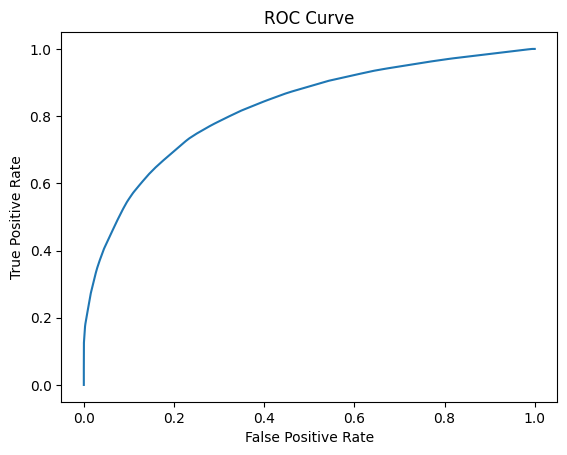

In [150]:
y_pred_train = dt_clf.predict(x_train)
y_pred_train_prob = dt_clf.predict_proba(x_train)
y_pred_train_prob.shape 
y_pred_train_prob_class1 = y_pred_train_prob[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob_class1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

##### 3.2 Prunning

In [151]:
# Training data Evaluation
y_pred_train = dt_clf_pruning.predict(x_train)

cnf_mat_train = confusion_matrix(y_pred_train, y_train)
print('Conifusion Matrix :\n', cnf_mat_train)

acc_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:\n",acc_train)

clf_report_train = classification_report(y_pred_train, y_train)
print("Classification Report:\n", clf_report_train)

Conifusion Matrix :
 [[15822  2439]
 [ 1701 11579]]
Accuracy:
 0.8687422719634761
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     18261
           1       0.83      0.87      0.85     13280

    accuracy                           0.87     31541
   macro avg       0.86      0.87      0.87     31541
weighted avg       0.87      0.87      0.87     31541



In [152]:
# Testing data Evaluation
y_pred = dt_clf_pruning.predict(x_test)

cnf_mat_test = confusion_matrix(y_pred, y_test)
print('Conifusion Matrix :\n', cnf_mat_test)

acc_test = accuracy_score(y_pred, y_test)
print("Accuracy:\n",acc_test)

clf_report_test = classification_report(y_pred, y_test)
print("Classification Report:\n", clf_report_test)

Conifusion Matrix :
 [[4686 1289]
 [1155 3384]]
Accuracy:
 0.7675480311965
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      5975
           1       0.72      0.75      0.73      4539

    accuracy                           0.77     10514
   macro avg       0.76      0.76      0.76     10514
weighted avg       0.77      0.77      0.77     10514



Text(0.5, 1.0, 'ROC Curve')

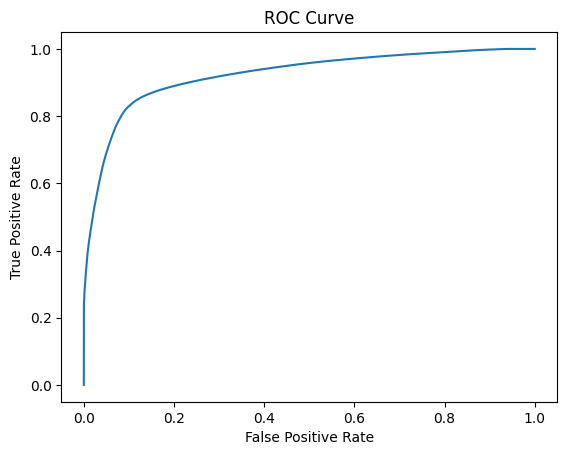

In [153]:
y_pred_train = dt_clf_pruning.predict(x_train)
y_pred_train_prob = dt_clf_pruning.predict_proba(x_train)
y_pred_train_prob.shape 
y_pred_train_prob_class1 = y_pred_train_prob[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob_class1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

#### 4. Random Forest

In [29]:
# Training data Evaluation
y_pred_train = rscv_rf_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_pred_train, y_train)
print('Conifusion Matrix :\n', cnf_mat_train)

acc_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:\n",acc_train)

clf_report_train = classification_report(y_pred_train, y_train)
print("Classification Report:\n", clf_report_train)

Conifusion Matrix :
 [[15322  5244]
 [ 2201  8774]]
Accuracy:
 0.7639580228908405
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80     20566
           1       0.63      0.80      0.70     10975

    accuracy                           0.76     31541
   macro avg       0.75      0.77      0.75     31541
weighted avg       0.79      0.76      0.77     31541



In [30]:
# Testing data Evaluation
y_pred = rscv_rf_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_pred, y_test)
print('Conifusion Matrix :\n', cnf_mat_test)

acc_test = accuracy_score(y_pred, y_test)
print("Accuracy:\n",acc_test)

clf_report_test = classification_report(y_pred, y_test)
print("Classification Report:\n", clf_report_test)

Conifusion Matrix :
 [[5043 1786]
 [ 798 2887]]
Accuracy:
 0.7542324519688035
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      6829
           1       0.62      0.78      0.69      3685

    accuracy                           0.75     10514
   macro avg       0.74      0.76      0.74     10514
weighted avg       0.78      0.75      0.76     10514



Text(0.5, 1.0, 'ROC Curve')

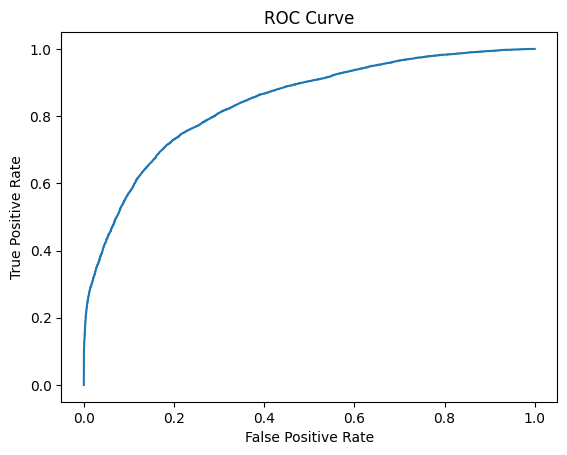

In [31]:
y_pred_train = rscv_rf_clf.predict(x_train)
y_pred_train_prob = rscv_rf_clf.predict_proba(x_train)
y_pred_train_prob.shape 
y_pred_train_prob_class1 = y_pred_train_prob[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob_class1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

#### 5. Adaboost

In [93]:
# Training data Evaluation
y_pred_train = adb_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_pred_train, y_train)
print('Conifusion Matrix :\n', cnf_mat_train)

acc_train = accuracy_score(y_pred_train, y_train)
print("Accuracy:\n",acc_train)

clf_report_train = classification_report(y_pred_train, y_train)
print("Classification Report:\n", clf_report_train)

Conifusion Matrix :
 [[14497  4544]
 [ 3026  9474]]
Accuracy:
 0.7599949272375638
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79     19041
           1       0.68      0.76      0.71     12500

    accuracy                           0.76     31541
   macro avg       0.75      0.76      0.75     31541
weighted avg       0.77      0.76      0.76     31541



In [94]:
# Testing data Evaluation
y_pred = adb_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_pred, y_test)
print('Conifusion Matrix :\n', cnf_mat_test)

acc_test = accuracy_score(y_pred, y_test)
print("Accuracy:\n",acc_test)

clf_report_test = classification_report(y_pred, y_test)
print("Classification Report:\n", clf_report_test)

Conifusion Matrix :
 [[4814 1488]
 [1027 3185]]
Accuracy:
 0.7607951303024538
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      6302
           1       0.68      0.76      0.72      4212

    accuracy                           0.76     10514
   macro avg       0.75      0.76      0.75     10514
weighted avg       0.77      0.76      0.76     10514



Text(0.5, 1.0, 'ROC Curve')

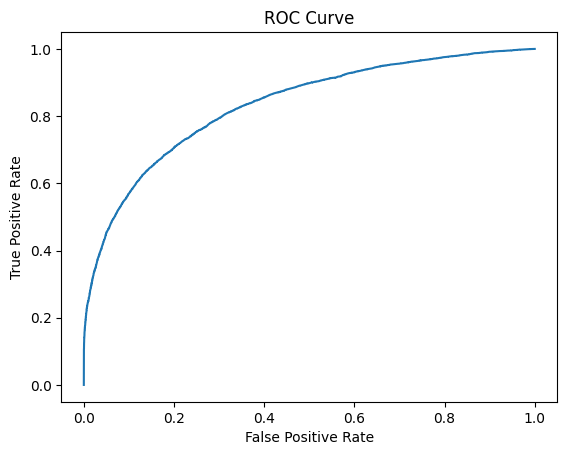

In [95]:
y_pred_train = adb_clf.predict(x_train)
y_pred_train_prob = adb_clf.predict_proba(x_train)
y_pred_train_prob.shape 
y_pred_train_prob_class1 = y_pred_train_prob[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob_class1)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

## Model Deployment

In [32]:
with open(r'artifacts/model.pkl','wb') as f:
    pkl.dump(rscv_rf_clf, f)

In [33]:
column_name = X.columns
project_data = {"Column Name" : column_name.tolist()}

with open(r'artifacts/project_data.json','w') as f:
    json.dump(project_data, f)

In [34]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [35]:
with open(r'artifacts/normal_scaler.pkl','wb') as f:
    pkl.dump(normal_scaler, f)

NameError: name 'normal_scaler' is not defined

In [47]:
knn_clf.n_features_in_

23